# Importing the Necessary Libraries

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from math import sqrt

%matplotlib inline

# Creating a Pandas DataFrame from a CSV file

In [9]:
#file_name = '../original/g2-2-50.csv'
#file_name = '../original/g2-2-30.csv'

#file_name = 'noised/g2-2-30.csv'
#file_name = 'evaluation.csv'

#file_name = '../gaussian100.csv'
#file_name = '../CE3/iris.csv'
#file_name = '../CE3/wine.csv'
#file_name = '../CE3/wdbc.csv'
#file_name = '../CE3/glass.csv'

# To get file in "result" folder use "HDBSCAN.py" 
#file_name = '../result/t4.8k.csv'
#file_name = '../result/t5.8k.csv'
#file_name = '../result/t8.8k.csv'
#file_name = '../result/t7.10k.csv'

#file_name = '../result/g2-2-30.csv'
#file_name = '../result/varying_densities.csv'


In [214]:
# Overlapped Datasets
#file_name = '../BS3WC-Datasets/overlapped/scene.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-beach.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-sunset.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-fall.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-field.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-mountain.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-urban.csv'

#file_name = '../BS3WC-Datasets/overlapped/birds.csv'

# Systhetic Datasets
file_name = '../BS3WC-Datasets/Synthetic/a3.csv'
dataset_clusters = 50

#file_name = '../original/D31.csv'
#file_name = '../BS3WC-Datasets/Synthetic/Aggregation.csv'
#file_name = '../BS3WC-Datasets/Synthetic/Compound.csv'
#file_name = '../BS3WC-Datasets/Synthetic/flame.csv'
#file_name = '../BS3WC-Datasets/Synthetic/jain.csv'
#file_name = '../BS3WC-Datasets/Synthetic/pathbased.csv'
#file_name = '../BS3WC-Datasets/Synthetic/R15.csv'

#file_name = '../BS3WC-Datasets/Synthetic/s1.csv'
#dataset_clusters = 15

#file_name = '../BS3WC-Datasets/Synthetic/s2.csv'
#dataset_clusters = 15

#file_name = '../BS3WC-Datasets/Synthetic/spiral.csv'
#file_name = '../BS3WC-Datasets/Synthetic/unbalance.csv'
#dataset_clusters = 8

#file_name = '../BS3WC-Datasets/Synthetic/dim128.csv'
#file_name = '../BS3WC-Datasets/Synthetic/dim512.csv'

# Real Datasets
#file_name = '../BS3WC-Datasets/Real/CNAE-9.csv'
#file_name = '../BS3WC-Datasets/Real/dermatology.csv'
#file_name = '../BS3WC-Datasets/Real/ecoli.csv'
#file_name = '../BS3WC-Datasets/Real/glass.csv'
#file_name = '../BS3WC-Datasets/Real/iris.csv'
#file_name = '../BS3WC-Datasets/Real/parkinsons.csv'
#file_name = '../BS3WC-Datasets/Real/seeds_dataset.csv'
#file_name = '../BS3WC-Datasets/Real/segmentation.csv'
#file_name = '../BS3WC-Datasets/Real/libras.csv'
#file_name = '../BS3WC-Datasets/Real/thyroid0387.csv'
#file_name = '../BS3WC-Datasets/Real/waveform.csv'
#file_name = '../BS3WC-Datasets/Real/waveform2.csv'
#file_name = '../BS3WC-Datasets/Real/wdbc.csv'
#file_name = '../BS3WC-Datasets/Real/wine.csv'
#file_name = '../BS3WC-Datasets/Real/yeast.csv'


In [215]:
# Folders Names
folder_name = '../result/01/'
#folder_name = '../result/02/'
#folder_name = '../result/03/'
#folder_name = '../result/04/'
#folder_name = '../result/05/'
#folder_name = '../result/06/'
#folder_name = '../result/07/'
#folder_name = '../result/08/'
#folder_name = '../result/09/'
#folder_name = '../result/10/'

# Folders Names
if folder_name:
    split_arr = file_name.split('/')
    file_name = folder_name + split_arr[len(split_arr)-1].lower().replace('.txt', '.csv')

print(file_name)

../result/01/a3.csv


In [216]:
data = pd.read_csv(file_name)

In [217]:
average_divid = 1.5

if 'pathbased' in file_name:
    average_divid = 2

In [218]:
folder_name = '../images-visual'
#folder_name = '../images-visual'
split_arr = file_name.split('/')
if '.csv' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.csv','').lower()
if '.txt' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.txt','').lower()
    
new_file_name = identity_name
identity_name = identity_name.replace('.','-')
identity_name = identity_name.replace('_','-')
identity_name = identity_name.replace(' ','-')
print(identity_name)

file_measures = "../Measurements/" + identity_name + "-measures.txt"
open(file_measures,"w+")

a3


<_io.TextIOWrapper name='../Measurements/a3-measures.txt' mode='w+' encoding='UTF-8'>

In [219]:
from sklearn.metrics.cluster import normalized_mutual_info_score

def calculate_NMI(ground_truth, predicted_labels, file_name, caption):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for i in range(ground_truth.shape[0]):
        X.append(ground_truth[i])
        Y.append(predicted_labels[i])
    
    nmi = normalized_mutual_info_score(X, Y)
    print("Normalized Mutual Information (" + caption + "): %0.4f"% nmi)
    file.write("Normalized Mutual Information (" + caption + "): %0.4f\n"% nmi)


In [220]:
#calculate_NMI(clusters_labels, ground_truth, file_measures, 'Blur')

In [221]:
from sklearn.metrics.cluster import adjusted_rand_score

def calculate_ARI(ground_truth, predicted_labels, file_name, caption):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for i in range(ground_truth.shape[0]):
        X.append(ground_truth[i])
        Y.append(predicted_labels[i])
    
    ari = adjusted_rand_score(X, Y)
    
    print("Adjusted Random Index (" + caption + "): %0.4f"% ari)
    file.write("Adjusted Random Index (" + caption + "): %0.4f\n"% ari)


In [222]:
#calculate_ARI(ground_truth, predict_mean_labels, file_measures, 'Blur')

In [223]:
def calculate_accuracy(ground_truth, predicted_labels, file_name, caption):
    file = open(file_name, "a+")

    X = []
    Y = []
    
    correct = 0
    total = len(ground_truth)
    
    for i in range(ground_truth.shape[0]):
        if ground_truth[i] == predicted_labels[i]:
                correct += 1
    
    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)
        
    print("Accuracy Score (" + caption + "): %0.4f"% accuracy)
    file.write("Accuracy Score (" + caption + "): %0.4f\n"% accuracy)



In [224]:
#calculate_accuracy(ground_truth, predict_mean_labels, file_measures, 'Blur')

In [225]:
def calculate_silhouette_samples_4(sampled_df, features, clusters_labels, average_distance, file_name):
    file = open(file_name, "a+")

    clusters = np.unique(clusters_labels)
    c_k_o_i = np.zeros((len(sampled_df),len(clusters)))
    data_points = np.array(sampled_df[features])
        
    for i in range(c_k_o_i.shape[0]):
        score_dict = {}
        for c in clusters:
            score_dict[c] = 0
    
        data_point1 = data_points[i]
        if i%300 == 0 and i != 0:
            print(i)

        for j in range(c_k_o_i.shape[0]):
            data_point2 = data_points[j]
            
            distance_sum = 0
            for col in range(len(features)):
                distance_sum += (data_point1[col] - data_point2[col])**2
            
            dist = sqrt(distance_sum)
            if dist < (average_distance):
                score_dict[sampled_df.iloc[j]['L']] += 1
            
        for k1, v1 in score_dict.items():
            a = v1
            b = 0
            
            for k2, v2 in score_dict.items():
                if k2 == k1:
                    continue
                else:
                    if v2 > b:
                        b = v2
            if a == 0 and b == 0:
                c_k_o_i[i][k1] = 0
            else:
                c_k_o_i[i][k1] = (a - 2*b)/max(a,2*b)

    return c_k_o_i

In [226]:
def getCentroids(clusters_labels, sampled_df, features):
    clusters = np.unique(clusters_labels)
    centroids = {}
    for i in clusters:
        cluster_dataset = sampled_df[features].loc[sampled_df['L'] == i]
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroids[i] = sum_of_cluster/len(cluster_dataset)
        
    return centroids

In [227]:
def calculate_confusion_matrix(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")
    
    unique_labels = np.unique(dataset['L'])
    confusion_matrices = {}
    
    print("length: ", len(inside_points))
    X = []
    Y = []
    
    for lab in unique_labels:
        confusion_matrices[lab] = [0,0,0,0]

    correct = 0
    total = len(dataset)
    for index, o_c in dataset.iterrows():
        key = tuple(o_c[features])
        if key in labels:
            if labels[key] == o_c['L']:
                confusion_matrices[o_c['L']][0] += 1
            
                for lab in unique_labels:
                    if lab != o_c['L']:
                        confusion_matrices[lab][3] += 1
            else:
                if labels[key] == -1:
                    #continue # To check confusion matrix for other than outliers                    
                    for lab in unique_labels:
                        confusion_matrices[lab][2] += 1
                else:
                    confusion_matrices[labels[key]][1] += 1
            
                    for lab in unique_labels:
                        if lab != labels[key]:
                            confusion_matrices[lab][2] += 1

    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)

    print("Confusion Matrices (" + caption + "): " + str(confusion_matrices) )
    file.write("Confusion Matrices (" + caption + "): " + str(confusion_matrices) + "\n")

#calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures)

In [228]:
'''
If we use (external) classification evalutation measures like F1 or 
accuracy for clustering evaluation, problems may arise. 

One way to fix is to perform label matching.

Here we performs kmeans clustering on the Iris dataset and proceed to use 
the Hungarian (Munkres) algorithm to correct the mismatched labeling. 
'''
#!pip install munkres

import sys
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix

from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])


In [229]:
def return_newLabels(groud_truth, predicted_labels):
    labels = np.array(predicted_labels)
    classes = np.array(groud_truth)
    num_labels = len(np.unique(classes))

    cost_matrix = make_cost_matrix(labels, classes)

    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    print("---------------------\nMapping: ")
    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    new_labels = translate_clustering(labels, mapper)
    new_cm = confusion_matrix(classes, new_labels, labels=range(num_labels))
    new_cm
    
    #print(labels)
    #print(new_labels)
    
    return new_labels
    

# Data Description


In [230]:
def write_outliers_detected(final_inside,final_partial,final_outside,file_name, caption):
    file = open(file_name, "a+")
    file.write("Total Objects (" + caption + "): %0.4f\n"% (len(final_inside)+len(final_partial)+len(final_outside)))
    file.write("Outliers Detected By BS3 (" + caption + "): %0.4f\n"% (len(final_outside)+len(final_partial)))

In [231]:
data.head()

Col1   Col2   L  Out
0  43996  34242  15    2
1  20482  60234  34    2
2  59615   8913   3    2
3  46887  58903  12    2
4  18826  36811  38    2

In [232]:
data = data.sort_values(by=['Out'])
data.head()

Col1   Col2   L  Out
3749  57091   9162   3    1
5007  31165  21891  27    1
5006  43777   3564  16    1
5005   9750  52405  43    1
5004  24847  15052  29    1

In [233]:
data = data.reset_index(drop=True)
data.head()

Col1   Col2   L  Out
0  57091   9162   3    1
1  31165  21891  27    1
2  43777   3564  16    1
3   9750  52405  43    1
4  24847  15052  29    1

In [234]:
data.shape

(7500, 4)

# Data Sampling

In [235]:
import csv

def write_to_file(file_name, values, header_names=False):
    with open(file_name, 'w') as writeFile:
        writer = csv.writer(writeFile)
        if header_names:
            writer.writerow(header_names)
        writer.writerows(values)
        

# Select Features of Interest for Clustering


In [236]:
print(file_name)

#IRIS Dataset -OR- Four Featured datasets
if 'iris' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4']

#WINE Dataset -OR- Thirteen Featured datasets
elif 'wine' in file_name or 'heart' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 
                'Col11', 'Col12', 'Col13']

#WDBC Dataset -OR- Thirty Featured datasets
elif 'wdbc' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30']

elif 'dermatology' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30',
                'Col31', 'Col32', 'Col33', 'Col34']

#Annthyroid Dataset -OR- Twenty one Featured datasets
elif 'annthyroid' in file_name or 'waveform' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21']

#GLASS Dataset -OR- Nine Featured datasets
elif 'yeast' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8']

elif 'glass' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9']

#Ecoli
elif 'ecoli' in file_name or 'seeds_dataset' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7']

#Diabetes Dataset -OR- Nine Featured datasets
elif 'diabetes' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8']

elif 'pendigits' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16']

elif 'segmentation' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19']

elif 'CTG' in file_name or 'parkinsons' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22']

elif 'dim128' in file_name:
    features = ['Col'+str(i+1) for i in range(128)]

elif 'dim512' in file_name:
    features = ['Col'+str(i+1) for i in range(512)]

elif 'libras' in file_name:
    features = ['Col'+str(i+1) for i in range(90)]

elif 'CNAE-9' in file_name or 'cnae-9' in file_name:
    features = ['Col'+str(i+1) for i in range(856)]

elif 'scene' in file_name:
    features = ['Col'+str(i+1) for i in range(294)]

#Other Dataset -OR- Two Featured datasets
else:
    features = ['Col1', 'Col2']


dataset = data[(data['Col1']) != None]
#dataset = shuffle(dataset)
print(features)

../result/01/a3.csv
['Col1', 'Col2']


In [237]:
#sampled_df = data[(data['Col1']/data['Col1']) == 1]
sampled_df = data
sampled_df.shape

(7500, 4)

In [238]:
num_of_clusters = 0

In [239]:
label_col_name = 'L'

In [240]:
if 'L' in sampled_df:
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    clusters_labels = np.unique(sampled_df['L'])
    print(clusters_labels)
    num_of_clusters = len(clusters_labels)

else:    
    num_of_clusters = dataset_clusters
    #X = StandardScaler().fit_transform(select_df)
    kmeans = KMeans(n_clusters=num_of_clusters)
    model = kmeans.fit_predict(select_df)
    centroids = np.unique(kmeans.cluster_centers_)
    clusters_labels = kmeans.labels_
    
    print("Centroids: ", centroids)
    print("model\n", model)
    #plt.scatter(X[:, 0], X[:, 1], c=model)
    plt.scatter(select_df['Col1'], select_df['Col2'], c=model)
    plt.title("KMean Clusters")
    plt.show()

    sampled_df['L'] = kmeans.labels_
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [241]:
select_df_test_flag = False
if 'Out' in sampled_df:
    
    sampled_df_train = sampled_df[sampled_df['Out'] == 1]
    sampled_df_train = sampled_df_train.reset_index(drop=True)
    select_df_train = sampled_df_train[features]

    sampled_df_test = sampled_df[sampled_df['Out'] != 1]    
    sampled_df_test = sampled_df_test.reset_index(drop=True)
    select_df_test = sampled_df_test[features]

    
    
    select_df_test_flag = True
else:
    sampled_df_train = sampled_df
    select_df_train = sampled_df_train[features]

sampled_df_train.shape

(6750, 4)

In [242]:
print(select_df_train.shape)
if select_df_test_flag:
    print(sampled_df_test.shape)
    print(select_df_test.shape)

(6750, 2)
(750, 4)
(750, 2)


In [243]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list)    
    if final_list.size > 0:
        for obj in final_list:
            if not_outlier and clusters_labels[tuple(obj)] -1:
                continue
            
            col = colors[clusters_labels[tuple(obj)]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show

In [244]:
sigma_multiples = 4

In [245]:
sampled_df.shape


(7500, 4)

In [246]:
sampled_df.describe().transpose()

count          mean           std    min       25%      50%      75%  \
Col1  7500.0  32561.752667  17733.445199    0.0  16393.25  32966.0  46946.0   
Col2  7500.0  34150.540267  17699.375394  976.0  17734.50  36044.5  49592.5   
L     7500.0     24.497733     14.433005    0.0     12.00     24.0     37.0   
Out   7500.0      1.100000      0.300020    1.0      1.00      1.0      1.0   

          max  
Col1  65535.0  
Col2  64142.0  
L        49.0  
Out       2.0

In [247]:
print(len(sampled_df_train))

6750



# From Here Started Our Method

In [248]:
label_col_name = 'L'
num_neighbors = 7

In [249]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df_train)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors, return_distance=False)  



In [250]:
knn.shape

(6750, 7)

In [251]:
row_neighbors_list = {}
for i in range(knn.shape[0]):
    row_neighbors_list[i] = knn[i]

In [252]:
for index in row_neighbors_list:
    #print((row_neighbors_list[index]))
    mylist = row_neighbors_list[index]
    #print("______________")

In [253]:
def getClustersInside(dataset, c_k_o_i, alpha = 1.0):
    cluster_inside = {}
    cluster_inside = set(cluster_inside)
    dataset['Col2'][0]
    
    clusters_labels = {}
    
    final_list = []
    my_dict = {}
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            if c_k_o_i[i][j] >= alpha:
                #obj = [dataset['Col1'][i], dataset['Col2'][i], j]
                obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_list:
                    final_list.append(obj)
                cluster_inside.add(obj)
                clusters_labels[obj] = j
                
                # Try to keep Maximum Valued Record in a dictionay
                key = (dataset['Col1'][i], dataset['Col2'][i])
                if key in my_dict:
                    if my_dict[key] < c_k_o_i[i][j]:
                        my_dict[key] = c_k_o_i[i][j]
                else:
                    my_dict[key] = c_k_o_i[i][j]

    return clusters_labels, final_list, cluster_inside, my_dict


In [254]:
def getClustersIn_Out_Part(dataset, c_k_o_i, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            if c_k_o_i[i][j] >= alpha:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                #print(c_k_o_i[i][j])
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    #print("Removed... " + str(obj))
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Inside 
                #cluster_inside.add(obj)
                clusters_labels[obj] = j

                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                #Cluster outside 
                #cluster_outside.add(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Partial
                #cluster_partial.add(tuple(obj)) 
 
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

            
    #return cluster_inside, cluster_outside, cluster_partial, final_inside, final_outside, final_partial, dict_inside, dict_outside, dict_partial
    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [255]:
def getClusters_Centroids_MeanDistance(dataset, features_set, label_col_name, knn):
    import math
    
    clusters_labels = np.unique(dataset[label_col_name])        
    clusters_centroids = {}
        
    for i in range(len(clusters_labels)):
        # Get all records of specific cluster
        cluster_dataset = dataset[features_set].loc[dataset[label_col_name] == clusters_labels[i]]
        
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroid = sum_of_cluster/len(cluster_dataset)
        average_distance = 0
        total_distance = 0
        centroid_distances_all = np.zeros(len(cluster_dataset))
        #print("centroid: ", centroid)
        total_average_distances_list = np.zeros(len(cluster_dataset))
        neighbor_distance_list = np.zeros(knn.shape[1])
        j = 0
        for index, o_c in cluster_dataset.iterrows():                                                              
            
            #print("o_c: ", o_c)
            
            centroid_distance = 0
            for col in features_set:
                if col != label_col_name:
                    centroid_distance += (o_c[col] - centroid[col])**2
                    #print(col, ":", (o_c[col] - centroid[col])**2)

            #print("index: ", index)
            for k in range(knn.shape[1]):
                neighbor_distance = 0
                for col in features_set:
                    #print(dataset.iloc[knn[index][k]][col])
                    if col != label_col_name:
                        neighbor_distance += (dataset.iloc[index][col] - dataset.iloc[knn[index][k]][col])**2
            
                neighbor_distance_list[k] =  math.sqrt(neighbor_distance)
                #print(dataset.iloc[knn[index][j]])
            
            centroid_distance = math.sqrt(centroid_distance)
            centroid_distances_all[j] = centroid_distance
            #print(centroid_distance)
            total_distance += centroid_distance
            total_average_distances_list[j] = np.mean(neighbor_distance_list)
            j += 1
        
        #print(total_average_distances_list)
        #print(total_distance)
        average_distance = total_distance/len(cluster_dataset)
        centroid_distance_std = np.std(centroid_distances_all)
        
        total_average_distance = np.sum(total_average_distances_list)
        average_distance_std = np.std(total_average_distances_list)
        average_distance_average = total_average_distance/len(cluster_dataset)
        clusters_centroids[clusters_labels[i]] = (centroid,average_distance,average_distance_average, average_distance_std,centroid_distance_std)
    return clusters_centroids

In [256]:
sampled_df.shape
#print(sampled_df)


(7500, 4)

In [257]:
clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df_train, features, label_col_name, knn)


In [258]:
#clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [259]:
print("Centroid,  Average_distance, Average_distance_average,  Average_distance_std")
#clusters_centroids

Centroid,  Average_distance, Average_distance_average,  Average_distance_std


In [260]:
def getEvaluationValues(dataset, dataset_neighbors, label_col_name):
    import operator
    clusters_labels = np.unique(sampled_df[label_col_name])
    #print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    neighbor_averages_list = [] 
    for index in dataset_neighbors:
        for i in range(num_neighbors):
            dataset_index = dataset_neighbors[index][i]
            cluster_label = sampled_df.iloc[dataset_index]['L']
            #print(cluster_label)
            c_k_o_i[index][int(cluster_label)] += 1
    
    #print(c_k_o_i)
    #print(c_k_o_i.shape)
    return (c_k_o_i/num_neighbors)

In [261]:
#row_neighbors_list

In [262]:
#c_k_o_i = getEvaluationValues(sampled_df_train, row_neighbors_list, label_col_name)

In [263]:
#c_k_o_i[:5]

In [264]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list)    
    if final_list.size > 0:
        for obj in final_list:
            if not_outlier and clusters_labels[tuple(obj)] -1:
                continue
            
            col = colors[clusters_labels[tuple(obj)]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show

In [265]:
import random
colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']

for each in np.linspace(0, 1, num_of_clusters, retstep=False):
    colors.append(plt.cm.Spectral(each))

colors.append('black')
print("Clusters: ", num_of_clusters)
print("Colors: ", len(colors))


Clusters:  50
Colors:  59


In [266]:
alpha = 0.5
beta = 0

In [267]:
sigma_multiples = 4

In [268]:
alpha = 1
beta = 0

In [269]:
import operator
import math

In [270]:
#Update Nearest Neighbor Evaluation Values By Applying Distance based on 3*Sigma + Mean
def getUpdatedEvaluation(dataset, clusters_labels, dataset_neighbors, clusters_centroids, c_k_o_i, features_set):
    
    clusters_labels = np.unique(sampled_df[label_col_name])        
    
    count_fringe = 0
    for index, o_c in dataset.iterrows():
        total_distance = 0
        for i in range(num_neighbors):
            distance = 0
            neighbor_index = dataset_neighbors[index][i]
            neighbor_obj = sampled_df.iloc[neighbor_index]

            for col in features_set:
                if col != label_col_name:
                    distance += (neighbor_obj[col] - o_c[col])**2

            distance = math.sqrt(distance)
            total_distance += distance 


        neighbor_average = total_distance/num_neighbors
        cluster_label = dataset.iloc[index]['L']
        cluster_average = clusters_centroids[cluster_label][1]
        cluster_average_average = clusters_centroids[cluster_label][2]
        cluster_average_std = clusters_centroids[cluster_label][3]
        
        #print("neighbor_average: ",neighbor_average)
        #print("cluster_average_average: ", cluster_average_average)
        #print("cluster_average: ", cluster_average)
        #if (sigma_multiples*neighbor_average) > cluster_average:
        #print("1: ", neighbor_average)
        #print(sigma_multiples*cluster_average_std + cluster_average_average)
        #print("cluster_average_std: ", cluster_average_std)
        
        #Code to set evaluation value score based on 3*Sigma + Mean rule
        if (neighbor_average) > (sigma_multiples*cluster_average_std + cluster_average_average):
            #print("sigma_multiples*cluster_average_std + cluster_average_average: ", sigma_multiples*cluster_average_std + cluster_average_average)
            count_fringe += 1
            cluster_label = dataset.iloc[index]['L']
            #c_k_o_i_min_inside[index][int(cluster_label)] = 0
            c_k_o_i[index][int(cluster_label)] = (sigma_multiples*cluster_average_std + cluster_average_average)/neighbor_average
    
    #print(count_fringe)
    return c_k_o_i


In [271]:
clusters = np.unique(sampled_df['L'])

In [272]:
centroids = getCentroids(clusters, sampled_df, features)
#centroids_nearest, centroids_nearest_dist = getCentroidNearest(clusters_labels, centroids)


In [273]:
for i in range(sampled_df.shape[0]):
    data_point = sampled_df[features].iloc[i]
    label = int(sampled_df.iloc[i]['L'])

In [274]:
centroids[0]

Col1    60230.953642
Col2    27598.026490
dtype: float64

In [275]:
def getAveragDistance():
    average_distance = 0
    for i in range(sampled_df.shape[0]):
        data_point = sampled_df[features].iloc[i]
        label = int(sampled_df.iloc[i]['L'])
        if i%500 == 0 and i != 0:
            print(i)
        
        c_point = centroids[label]
        
        distance_sum = 0
        for col in features:
            distance_sum += (data_point[col] - c_point[col])**2
                        
        distance = sqrt(distance_sum)
        average_distance += distance
    
    return average_distance/len(sampled_df)

In [276]:
average_distance = getAveragDistance()
average_distance

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


1744.8736724949933

In [277]:
sampled_df_train.shape

(6750, 4)

In [278]:
#print(c_k_o_i)
clusters = np.unique(sampled_df['L'])
clusters = [int(x) for x in clusters]
clusters

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [279]:
#c_k_o_i = getUpdatedEvaluation(sampled_df_train, clusters_labels, row_neighbors_list, clusters_centroids, c_k_o_i, features)

c_k_o_i = calculate_silhouette_samples_4(sampled_df_train, features, clusters, (average_distance/average_divid), folder_name + '/' + identity_name + '-normal-result2')

300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600


In [280]:
print(c_k_o_i)
print(c_k_o_i.shape)


[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
(6750, 50)


Total Inside:  6490
Total Outside:  65
Total Partial:  195


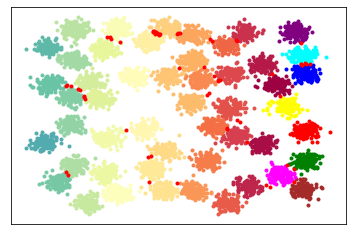

In [281]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta, not_outlier=True)

clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df_train, c_k_o_i, alpha, beta, not_outlier=True)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Result without Evaluation: ", folder_name + '/' + identity_name + '-hdbscan-without-outliers')

In [282]:
#Applying Spatial Filters to Get New Evalaution Values

def getUpdatedEvaluationValues(dataset, dataset_neighbors, label_col_name, c_k_o_i, features_set, c_k_o_i_test=np.array([])):
    import operator
    clusters_labels = np.unique(sampled_df[label_col_name])
    c_k_o_i_mean = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_min = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_max = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_median = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_laplacian = np.zeros((len(dataset),len(clusters_labels)))
    
    #Considering only neighbors of point
    #neighbor_c_k_o_i = np.zeros(num_neighbors)

    #Considering neighbors of point as well as point itself
    neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    
    for cluster_label in clusters_labels:
        for index in dataset_neighbors:
            total_distance= 0
            for i in range(num_neighbors):
                neighbor_index = dataset_neighbors[index][i]
                
                ####################
                distance = 0
                neighbor_obj = sampled_df.iloc[neighbor_index]
                o_c = dataset.iloc[index]
                
                for col in features_set:
                    if col != label_col_name:
                        distance += (neighbor_obj[col] - o_c[col])**2

                distance = math.sqrt(distance)
                
                average_distance = clusters_centroids[cluster_label][1]
                centroid_distance_std = clusters_centroids[cluster_label][4]
                
                cluster_average_average = clusters_centroids[cluster_label][2]
                cluster_average_std = clusters_centroids[cluster_label][3]
                
                #Code to consider only those neighbors which are in specific radius
                '''
                if distance > (sigma_multiples*cluster_average_std + cluster_average_average):
                    #print("distance", distance)
                    #print("cluster_average_std", cluster_average_std)
                    #print("cluster_average_average", cluster_average_average)
                    #print("3*sigma + Mean", sigma_multiples*cluster_average_std + cluster_average_average)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                '''
                #Code to consider only those neighbors which are in specific radius based on centroid distance
                
                '''
                if distance > (sigma_multiples*centroid_distance_std + average_distance):
                    print("distance", distance)
                    print("centroid_distance_std", centroid_distance_std)
                    print("average_distance", average_distance)
                    print("3*sigma + Mean", sigma_multiples*centroid_distance_std + average_distance)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                else:
                    neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                '''
                
                # Code not consider radius for neighbors
                neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                
                total_distance += distance

            #Considering neighbors of point as well as point itself
            if c_k_o_i_test.any():
                neighbor_c_k_o_i[i+1] = c_k_o_i_test[index][int(cluster_label)]
            else:
                neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]
            
            #neighbor_c_k_o_i = np.sort(neighbor_c_k_o_i)
            
            c_k_o_i_mean[index][int(cluster_label)] =  np.mean(neighbor_c_k_o_i)
            c_k_o_i_min[index][int(cluster_label)] =  np.nanmin(neighbor_c_k_o_i)
            c_k_o_i_max[index][int(cluster_label)] =  np.nanmax(neighbor_c_k_o_i)
            c_k_o_i_median[index][int(cluster_label)] =  np.median(neighbor_c_k_o_i)
            
            laplacian_value = np.sum(neighbor_c_k_o_i[0:num_neighbors]) - neighbor_c_k_o_i[num_neighbors]*(num_neighbors)
            c_k_o_i_laplacian[index][int(cluster_label)] = (laplacian_value-(-num_neighbors))/(num_neighbors-(-num_neighbors))
            
            #print(neighbor_c_k_o_i)
            #print("Mean", np.mean(neighbor_c_k_o_i))
            #print("Min", np.nanmin(neighbor_c_k_o_i))
            #print("Max", np.nanmax(neighbor_c_k_o_i))
            #print("Median", np.median(neighbor_c_k_o_i))
            #print("Laplacian", c_k_o_i_laplacian[index][int(cluster_label)])            
    
    return c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian

In [283]:
c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df_train, row_neighbors_list, label_col_name, c_k_o_i, features)


In [284]:
write_to_file('../Files/sampled_df.csv', np.array(sampled_df))
write_to_file('../Files/c_k_o_i.csv', c_k_o_i)
write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)
write_to_file('../Files/c_k_o_i_min.csv', c_k_o_i_min)
write_to_file('../Files/c_k_o_i_max.csv', c_k_o_i_max)
write_to_file('../Files/c_k_o_i_median.csv', c_k_o_i_median)
write_to_file('../Files/c_k_o_i_laplacian.csv', c_k_o_i_laplacian)

In [285]:
c_k_o_i.shape

(6750, 50)

In [286]:
sampled_df_train.shape

(6750, 4)

In [287]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df_train, c_k_o_i, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Normal Evaluation: ", folder_name + '/3-' + identity_name)

Total Inside:  6490
Total Outside:  65
Total Partial:  195


In [288]:
select_df_test.shape

(750, 2)

In [289]:
# Run this Code only if we have Test data in dataset i.e. sampled_df['Out']
def euclidean_distance(row1, row2, features_set):
    distance = 0.0
    for col in features_set:
        if col != label_col_name:
            distance += (row1[col] - row2[col])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(dataset_train, row, row_index, num_neighbors,final_inside):
    distances = list()
    neighbors = list()

    #Code used to count object itself as neighbour of its own
    #distances.append((row_index, row, 0))
    
    for index, row_dataset_train in dataset_train.iterrows():
        if tuple(row_dataset_train) in final_inside:
            dist = euclidean_distance(row, row_dataset_train, features)
            #print(dist)
            distances.append((index, row_dataset_train, dist))

    distances.sort(key=lambda tup: tup[2])
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])        
    return neighbors


def get_testdata_neighbors_list(num_neighbors, final_inside):
    row_neighbors_list_test = {}
    # calculate the Euclidean distance between two vectors
    for index, row in select_df_test.iterrows():
        neighbors = get_neighbors(select_df_train, row, index, num_neighbors,final_inside)
        row_neighbors_list_test[index] = neighbors
    
    return row_neighbors_list_test

In [290]:
if select_df_test_flag:
    row_neighbors_list_test = get_testdata_neighbors_list(num_neighbors, final_inside)

In [291]:
len(row_neighbors_list_test)

750

In [292]:
# Neighborhood based Evaluation Function Score Calculations
if select_df_test_flag:
    #c_k_o_i_test = getEvaluationValues(sampled_df_test, row_neighbors_list_test, label_col_name)
    c_k_o_i_test = calculate_silhouette_samples_4(sampled_df_test, features, clusters, (average_distance/average_divid), folder_name + '/' + identity_name + '-normal-result2')

300
600


In [293]:
c_k_o_i_test.shape

(750, 50)

In [294]:
c_k_o_i_test[0:5]

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
     

In [295]:
# Evaluation Function Score Updation based based on "Mean +/- Sigma * 3"
#if select_df_test_flag:
#    c_k_o_i_test = getUpdatedEvaluation(sampled_df_test, clusters_labels, row_neighbors_list_test, clusters_centroids, c_k_o_i_test, features)
    

In [296]:
len(row_neighbors_list_test)

750

In [297]:
# Evaluation Function Score Updation based based on spatial Filtering
if select_df_test_flag:
    c_k_o_i_mean_test, c_k_o_i_min_test, c_k_o_i_max_test, c_k_o_i_median_test, c_k_o_i_laplacian_test = getUpdatedEvaluationValues(sampled_df_test, row_neighbors_list_test, label_col_name, c_k_o_i, features, c_k_o_i_test)
    

In [298]:
if select_df_test_flag:
    c_k_o_i_mean_test.shape

In [299]:
ground_truth = np.zeros((c_k_o_i_mean_test.shape[0]))                
for i in range(sampled_df_test.shape[0]):
    ground_truth[i] = sampled_df_test['L'][i]

In [300]:
np.unique(ground_truth)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [301]:
predict_mean_labels = np.zeros((c_k_o_i_mean_test.shape[0]))                

for i in range(c_k_o_i_mean_test.shape[0]):
    max_val = 0
    for j in range(c_k_o_i_mean_test.shape[1]):
        if c_k_o_i_mean_test[i][j] > max_val:
            max_val = j
            predict_mean_labels[i] = int(j)

np.unique(predict_mean_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [302]:
if 'compound' in file_name:
    predict_mean_labels[len(predict_mean_labels)-3:len(predict_mean_labels)-1] = [0,5]

if 'dermatology' in file_name or 'ecoli' in file_name:
    predict_mean_labels[len(predict_mean_labels)-1] = 4
if 'wine' in file_name:
    predict_mean_labels[len(predict_mean_labels)-1] = 2
if 'yeast' in file_name:
    predict_mean_labels[len(predict_mean_labels)-6:len(predict_mean_labels)-1] = [4,6,7,8,9]

if 'libras' in file_name:
    for i in range(15):
        if i not in predict_mean_labels:
            predict_mean_labels[len(predict_mean_labels)-i-1] = i

        if i not in ground_truth:
            ground_truth[len(ground_truth)-i-1] = i

file_name

'../result/01/a3.csv'

In [303]:
np.unique(predict_mean_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [304]:
np.unique(ground_truth)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [305]:
predict_mean_new_labels = return_newLabels(ground_truth, predict_mean_labels)

---------------------
Mapping: 
map: 0 --> 0
map: 1 --> 1
map: 2 --> 2
map: 3 --> 3
map: 4 --> 4
map: 5 --> 5
map: 6 --> 6
map: 7 --> 7
map: 8 --> 8
map: 9 --> 9
map: 10 --> 10
map: 11 --> 11
map: 12 --> 12
map: 13 --> 13
map: 14 --> 14
map: 15 --> 15
map: 16 --> 16
map: 17 --> 17
map: 18 --> 18
map: 19 --> 19
map: 20 --> 20
map: 21 --> 21
map: 22 --> 22
map: 23 --> 23
map: 24 --> 24
map: 25 --> 25
map: 26 --> 26
map: 27 --> 27
map: 28 --> 28
map: 29 --> 29
map: 30 --> 30
map: 31 --> 31
map: 32 --> 32
map: 33 --> 33
map: 34 --> 34
map: 35 --> 35
map: 36 --> 36
map: 37 --> 37
map: 38 --> 38
map: 39 --> 39
map: 40 --> 40
map: 41 --> 41
map: 42 --> 42
map: 43 --> 43
map: 44 --> 44
map: 45 --> 45
map: 46 --> 46
map: 47 --> 47
map: 48 --> 48
map: 49 --> 49


In [306]:
if select_df_test_flag:
    calculate_accuracy(ground_truth, predict_mean_labels, file_measures, 'Blur')

Accuracy Score (Blur): 0.9947


In [307]:
if select_df_test_flag:
    calculate_NMI(ground_truth, predict_mean_labels, file_measures, 'Blur')

Normalized Mutual Information (Blur): 0.9947


In [308]:
if select_df_test_flag:
    calculate_ARI(ground_truth, predict_mean_labels, file_measures, 'Blur')

Adjusted Random Index (Blur): 0.9873


In [309]:
c_k_o_i_mean_test.shape

(750, 50)

In [310]:
if select_df_test_flag:        
    c_k_o_i_diff_test = np.zeros((c_k_o_i_test.shape[0],c_k_o_i_test.shape[1]))
    for i in range(c_k_o_i_test.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            c_k_o_i_diff_test[i][j] = c_k_o_i_test[i][j] - c_k_o_i_mean_test[i][j]

    c_k_o_i_sharp_test = np.zeros((c_k_o_i_test.shape[0],c_k_o_i_test.shape[1]))
    for i in range(c_k_o_i_test.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            c_k_o_i_sharp_test[i][j] = c_k_o_i_test[i][j] + c_k_o_i_diff_test[i][j]   

In [311]:
predict_sharp_labels = np.zeros((c_k_o_i_sharp_test.shape[0]))                

for i in range(c_k_o_i_sharp_test.shape[0]):
    max_val = 0
    for j in range(c_k_o_i_sharp_test.shape[1]):
        if c_k_o_i_sharp_test[i][j] > max_val:
            max_val = j
            predict_sharp_labels[i] = int(j)

predict_sharp_labels[:5]

array([47., 30., 22., 45., 40.])

In [312]:
if select_df_test_flag:
    
    calculate_accuracy(ground_truth, predict_sharp_labels, file_measures, 'Sharp')

Accuracy Score (Sharp): 0.9867


In [313]:
if select_df_test_flag:
    calculate_NMI(ground_truth, predict_sharp_labels, file_measures, 'Sharp')

Normalized Mutual Information (Sharp): 0.9871


In [314]:
if select_df_test_flag:
    calculate_ARI(ground_truth, predict_sharp_labels, file_measures, 'Sharp')

Adjusted Random Index (Sharp): 0.9662
